In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")

In [6]:
listings_reduced = listings[['id', 'host_id', 
       'host_name', 'host_since', 
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', #'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', #'license', 
       'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

listings_reduced.shape


(36724, 58)

In [7]:
listings_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36724 entries, 0 to 36723
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36724 non-null  int64  
 1   host_id                                       36724 non-null  int64  
 2   host_name                                     36701 non-null  object 
 3   host_since                                    36701 non-null  object 
 4   host_response_time                            21048 non-null  object 
 5   host_response_rate                            21048 non-null  object 
 6   host_acceptance_rate                          21538 non-null  object 
 7   host_is_superhost                             36701 non-null  object 
 8   host_neighbourhood                            29853 non-null  object 
 9   host_listings_count                           36701 non-null 

In [11]:
listings_num = listings_reduced.select_dtypes(include=np.number)
listings_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36724 entries, 0 to 36723
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36724 non-null  int64  
 1   host_id                                       36724 non-null  int64  
 2   host_listings_count                           36701 non-null  float64
 3   host_total_listings_count                     36701 non-null  float64
 4   latitude                                      36724 non-null  float64
 5   longitude                                     36724 non-null  float64
 6   accommodates                                  36724 non-null  int64  
 7   bedrooms                                      32855 non-null  float64
 8   beds                                          36130 non-null  float64
 9   minimum_nights                                36724 non-null 

In [12]:
listings_num.isna().sum()

id                                                  0
host_id                                             0
host_listings_count                                23
host_total_listings_count                          23
latitude                                            0
longitude                                           0
accommodates                                        0
bedrooms                                         3869
beds                                              594
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                             17
maximum_minimum_nights                             17
minimum_maximum_nights                             17
maximum_maximum_nights                             17
minimum_nights_avg_ntm                             17
maximum_nights_avg_ntm                             17
availability_30                                     0
availability_60             

array([   0.,    1.,   14.,   27.,    3.,   23.,    2.,   15.,   25.,
         58.,  -15.,    5.,   17.,   16.,   13.,   29.,    6.,    4.,
          8.,  138.,    7.,   26.,   11.,   60.,   12.,    9.,  105.,
        290.,   33.,  -27.,   10.,   28.,   21.,   -1.,   -2.,   18.,
         30.,   22.,   -5.,  -28.,  179.,   19.,  -29.,   -3., -700.,
         34.,   20., -640.,   50.,  -26.,  -30.,   nan,  233.,  305.,
         24.,  144.,  -60.,  142.,   55.,  116.,  135.,   37.])

 0.0      35664
 1.0        359
 2.0        188
 5.0        121
 3.0         76
          ...  
-27.0         1
 33.0         1
 105.0        1
 13.0         1
 37.0         1
Length: 61, dtype: int64

(array([2.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.6355e+04, 3.2000e+02, 7.0000e+00, 4.0000e+00]),
 array([-700. , -599.5, -499. , -398.5, -298. , -197.5,  -97. ,    3.5,
         104. ,  204.5,  305. ]),
 <BarContainer object of 10 artists>)

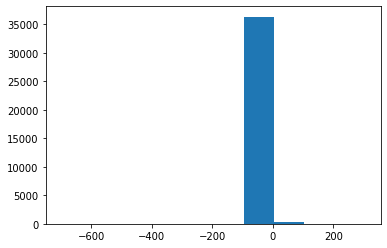

In [22]:
minN_minus_minMinN = listings_num.minimum_nights - listings_num.minimum_minimum_nights
minN_minus_minMinN.unique()
minN_minus_minMinN.value_counts()

plt.hist(minN_minus_minMinN)

array([   0.,   -2.,  -29.,  -17.,   -3.,   -1.,  -55.,   -4.,    3.,
         -9.,  -15.,  -25.,  -90.,   -5.,  -21.,  -13.,  -28.,  -27.,
        -11.,    2., -120.,  -60.,   60.,    1.,  -75.,  -80.,  -16.,
        -10.,  -20.,  -23.,   -6.,  -45.,   -8.,    7.,  -70.,  -26.,
         -7.,  -87.,  -86., -700.,  -19.,  -56., -176.,   23.,  -14.,
       -100., -640.,   28., -115., -113.,  -30.,  -43.,   29.,   nan,
        -59.,  -40., -670.,  -89.,  -49.])

 0.0      35142
-1.0        604
-700.0      281
-2.0        197
-3.0         75
-60.0        51
-27.0        46
-6.0         45
-29.0        29
-30.0        27
-4.0         24
-5.0         23
 1.0         15
-45.0        15
-7.0         13
-28.0         9
-26.0         8
-25.0         8
-11.0         7
-16.0         7
-8.0          6
-87.0         5
-86.0         5
-640.0        4
-10.0         4
-23.0         4
-9.0          4
-13.0         4
 2.0          3
 3.0          3
-21.0         3
-15.0         2
-14.0         2
-75.0         2
 29.0         2
-19.0         2
 28.0         2
-59.0         2
-70.0         2
 60.0         2
-115.0        1
-40.0         1
-670.0        1
-43.0         1
-89.0         1
-17.0         1
-113.0        1
-80.0         1
-176.0        1
-55.0         1
-100.0        1
 23.0         1
-56.0         1
-90.0         1
 7.0          1
-120.0        1
-20.0         1
-49.0         1
dtype: int64

(array([2.8600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 4.0000e+00, 2.2800e+02, 3.6188e+04]),
 array([-700., -624., -548., -472., -396., -320., -244., -168.,  -92.,
         -16.,   60.]),
 <BarContainer object of 10 artists>)

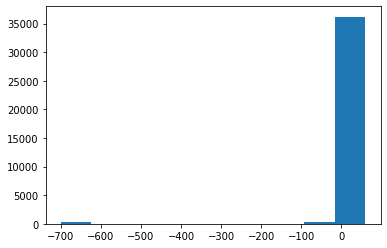

In [25]:
minN_minus_maxMinN = listings_num.minimum_nights - listings_num.maximum_minimum_nights
minN_minus_maxMinN.unique()
minN_minus_maxMinN.value_counts()

plt.hist(minN_minus_maxMinN)

array([ 0.000e+00, -1.000e-01, -7.300e+00, -2.000e-01,  1.000e-01,
       -1.300e+00,  1.000e+00, -1.220e+01, -3.000e-01,  2.000e-01,
       -2.390e+01,  1.000e-01,  5.000e-01, -3.000e-01,  1.000e-01,
        3.000e-01, -1.000e-01,  3.000e+00,  5.700e+00,  3.000e-01,
       -1.500e+01,  1.700e+00,  3.000e-01, -4.000e-01,  2.000e-01,
       -2.200e+00,  7.000e-01, -3.530e+01, -9.000e-01,  4.000e-01,
        6.400e+00, -1.800e+00, -8.000e-01, -6.000e-01, -7.000e+00,
        8.200e+00, -5.000e-01, -1.900e+00,  1.000e-01,  1.500e+00,
        9.000e-01, -1.000e-01, -7.000e-01,  3.920e+01,  6.000e-01,
        5.900e+00,  1.300e+00,  2.000e+00, -1.096e+02,  3.100e+00,
       -2.000e-01, -2.510e+01,  6.000e+01,  3.900e+00,  6.000e-01,
       -8.000e-01, -3.060e+01,  6.000e-01, -1.700e+00, -3.350e+01,
        1.700e+00, -4.000e-01, -4.700e+00, -1.000e+00, -9.800e+00,
        7.000e-01, -1.500e+00, -1.160e+01, -2.230e+01, -5.300e+00,
       -7.000e-01, -7.100e+00,  7.400e+00,  2.050e+01, -3.200e

 0.0      34935
-0.1        110
 0.5         90
-0.3         78
 0.1         73
          ...  
-677.7        1
-670.8        1
-0.7          1
-669.0        1
-4.8          1
Length: 309, dtype: int64

(array([2.8500e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 3.5000e+01, 3.6377e+04, 8.0000e+00]),
 array([-700.  , -617.22, -534.44, -451.66, -368.88, -286.1 , -203.32,
        -120.54,  -37.76,   45.02,  127.8 ]),
 <BarContainer object of 10 artists>)

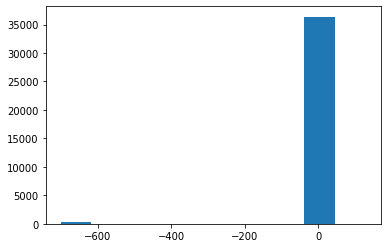

In [24]:
minN_minus_minNAvg = listings_num.minimum_nights - listings_num.minimum_nights_avg_ntm
minN_minus_minNAvg.unique()
minN_minus_minNAvg.value_counts()

plt.hist(minN_minus_minNAvg)

array([ 0.00000000e+00, -3.95000000e+02, -4.25000000e+02, -1.09500000e+03,
       -1.06500000e+03, -1.09600000e+03, -9.75000000e+02, -1.10000000e+03,
       -7.60000000e+02, -1.03500000e+03,  3.00000000e+01, -1.08000000e+03,
       -1.10400000e+03, -1.09800000e+03, -1.00000000e+00, -9.43000000e+02,
       -8.25000000e+02, -8.55000000e+02,  3.37000000e+02, -1.05500000e+03,
       -1.11100000e+03, -1.09700000e+03, -7.65000000e+02, -1.00500000e+03,
       -1.09400000e+03, -1.12200000e+03, -9.45000000e+02, -1.11300000e+03,
        6.00000000e+00, -1.12000000e+03,  5.00000000e+00, -1.08500000e+03,
       -6.00000000e+01, -1.11700000e+03, -1.11800000e+03, -1.10700000e+03,
       -1.10500000e+03, -1.09300000e+03,  1.03500000e+03, -1.11000000e+03,
        5.60000000e+01, -8.85000000e+02, -1.06400000e+03, -1.09000000e+03,
       -1.11500000e+03, -9.39000000e+02, -7.25000000e+02,  8.00000000e+00,
       -1.02500000e+03,  1.46000000e+02, -9.25000000e+02,  1.09500000e+03,
       -1.06600000e+03, -

 0.0       30725
-1095.0      810
-760.0       609
-1035.0      416
-1065.0      368
           ...  
-1052.0        1
-937.0         1
-990.0         1
-123.0         1
 362.0         1
Length: 259, dtype: int64

(array([3.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6671e+04]),
 array([-2.14748362e+09, -1.93273514e+09, -1.71798667e+09, -1.50323819e+09,
        -1.28848972e+09, -1.07374125e+09, -8.58992772e+08, -6.44244298e+08,
        -4.29495824e+08, -2.14747350e+08,  1.12400000e+03]),
 <BarContainer object of 10 artists>)

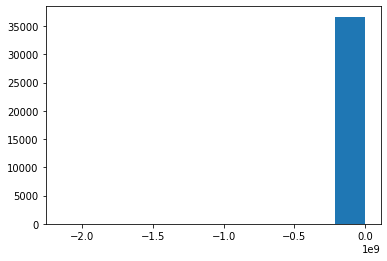

In [29]:
maxN_minus_minMaxN = listings_num.maximum_nights - listings_num.minimum_maximum_nights
maxN_minus_minMaxN.unique()
maxN_minus_minMaxN.value_counts()

plt.hist(maxN_minus_minMaxN)

array([ 0.00000000e+00, -3.95000000e+02, -4.25000000e+02, -1.09500000e+03,
       -1.06500000e+03, -1.09600000e+03, -9.75000000e+02, -1.10000000e+03,
       -7.60000000e+02, -1.03500000e+03, -1.08000000e+03, -1.10400000e+03,
       -1.09800000e+03, -1.00000000e+00, -9.43000000e+02, -8.25000000e+02,
       -8.55000000e+02, -1.05500000e+03, -1.11100000e+03, -1.09700000e+03,
       -7.65000000e+02, -1.00500000e+03, -1.09400000e+03, -1.12200000e+03,
       -9.45000000e+02, -1.11300000e+03, -1.12000000e+03, -1.08500000e+03,
       -1.11700000e+03, -1.11800000e+03, -1.10700000e+03, -1.10500000e+03,
       -1.09300000e+03, -1.11000000e+03, -8.85000000e+02, -1.06400000e+03,
       -1.09000000e+03, -1.11500000e+03, -1.11400000e+03, -9.39000000e+02,
       -7.25000000e+02, -1.02500000e+03, -9.25000000e+02, -1.06600000e+03,
       -9.44000000e+02, -6.45000000e+02, -1.03200000e+03, -1.25000000e+02,
       -9.15000000e+02, -1.07000000e+03, -7.59000000e+02, -1.06300000e+03,
       -1.10800000e+03, -

 0.0       30885
-1095.0      822
-760.0       612
-1097.0      424
-1035.0      420
           ...  
-1068.0        1
-970.0         1
-1053.0        1
-1067.0        1
-865.0         1
Length: 209, dtype: int64

(array([   62.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36645.]),
 array([-2.14748363e+09, -1.93273515e+09, -1.71798668e+09, -1.50323821e+09,
        -1.28848973e+09, -1.07374126e+09, -8.58992784e+08, -6.44244311e+08,
        -4.29495837e+08, -2.14747364e+08,  1.11000000e+03]),
 <BarContainer object of 10 artists>)

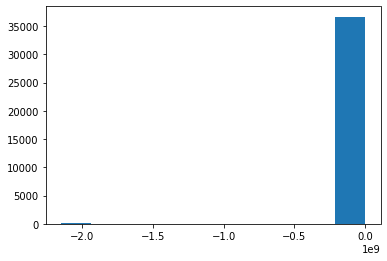

In [28]:
maxN_minus_maxMaxN = listings_num.maximum_nights - listings_num.maximum_maximum_nights
maxN_minus_maxMaxN.unique()
maxN_minus_maxMaxN.value_counts()

plt.hist(maxN_minus_maxMaxN)

array([ 0.00000000e+00, -3.95000000e+02, -4.25000000e+02, -1.09500000e+03,
       -1.06500000e+03, -1.09600000e+03, -9.75000000e+02, -1.10000000e+03,
       -7.60000000e+02, -1.03500000e+03,  7.50000000e+00, -1.08000000e+03,
       -1.10400000e+03, -1.09800000e+03, -1.00000000e+00, -9.43000000e+02,
       -8.25000000e+02, -8.55000000e+02, -6.80000000e+02, -1.05500000e+03,
       -1.11100000e+03, -1.09700000e+03, -7.65000000e+02, -1.00500000e+03,
       -1.09400000e+03, -1.12200000e+03, -9.45000000e+02, -1.11300000e+03,
        1.00000000e-01, -1.12000000e+03,  1.20000000e+00, -1.08500000e+03,
       -8.61300000e+02, -1.11700000e+03, -1.11800000e+03, -1.10700000e+03,
       -1.10500000e+03, -1.09300000e+03, -1.00340000e+03,  7.31000000e+01,
       -1.11000000e+03,  1.10000000e+00, -8.85000000e+02, -1.10470000e+03,
       -1.06400000e+03, -1.09000000e+03, -1.11500000e+03, -1.08610000e+03,
       -9.39000000e+02, -7.25000000e+02, -1.10250000e+03, -1.02500000e+03,
        2.38000000e+01, -

 0.0       30623
-1095.0      810
-760.0       607
-1035.0      416
-1065.0      368
           ...  
 5.2           1
 5.9           1
 1.5           1
-840.4         1
 284.5         1
Length: 429, dtype: int64

(array([4.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1000e+01, 5.0000e+00, 0.0000e+00, 3.6646e+04]),
 array([-2.14748362e+09, -1.93273514e+09, -1.71798667e+09, -1.50323820e+09,
        -1.28848973e+09, -1.07374125e+09, -8.58992781e+08, -6.44244308e+08,
        -4.29495835e+08, -2.14747363e+08,  1.11000000e+03]),
 <BarContainer object of 10 artists>)

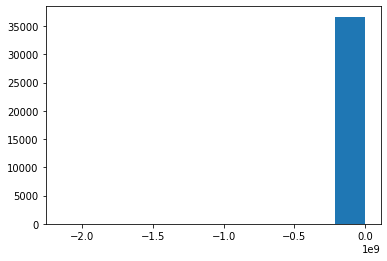

In [30]:
maxN_minus_maxNAvg = listings_num.maximum_nights - listings_num.maximum_nights_avg_ntm
maxN_minus_maxNAvg.unique()
maxN_minus_maxNAvg.value_counts()

plt.hist(maxN_minus_maxNAvg)

In [34]:
# Replace all Min_xx/Max_xx night with Min_nights/Max_nights
listings_num.minimum_minimum_nights.fillna(listings_num.minimum_nights, inplace=True)
listings_num.maximum_minimum_nights.fillna(listings_num.minimum_nights, inplace=True)
listings_num.minimum_nights_avg_ntm.fillna(listings_num.minimum_nights, inplace=True)
listings_num.minimum_maximum_nights.fillna(listings_num.maximum_nights, inplace=True)
listings_num.maximum_maximum_nights.fillna(listings_num.maximum_nights, inplace=True)
listings_num.maximum_nights_avg_ntm.fillna(listings_num.maximum_nights, inplace=True)

listings_num.isna().sum()

id                                                  0
host_id                                             0
host_listings_count                                23
host_total_listings_count                          23
latitude                                            0
longitude                                           0
accommodates                                        0
bedrooms                                         3869
beds                                              594
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm                              0
maximum_nights_avg_ntm                              0
availability_30                                     0
availability_60             